In [1]:
# !pip install -q git+https://github.com/huggingface/transformers.git
!pip install "transformers<4.41"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.2 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.40.2 which is incompatible.


In [2]:
# !pip install -q datasets seqeval
!pip install "datasets<3.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.2 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.40.2 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.6.1 which is incompatible.


In [3]:
!pip install accelerate -U

In [4]:
!pip install "pyarrow<12.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyarrow (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyarrow
Failed to build pyarrow
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyarrow)


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
!cp -r "/content/drive/MyDrive/binus/Semester5/finetune_layoutLM" .

In [8]:
!cp -r "/content/drive/MyDrive/binus/Semester5/finetune_layoutLM/data" .

In [9]:
import datasets, pyarrow, transformers
print("datasets:", datasets.__version__)
print("pyarrow:", pyarrow.__version__)
print("transformers:", transformers.__version__)
# print("pyarrow:", pyarrow.__version__)

datasets: 2.21.0
pyarrow: 18.1.0
transformers: 4.40.2


In [10]:
!mkdir -p /content/layoutlmv3
!cp -r /content/drive/MyDrive/binus/Semester5/finetune_layoutLM/* /content/layoutlmv3/

In [11]:
from datasets import load_dataset
dataset = load_dataset("./finetune_layoutLM/layoutlmv3.py")

In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 11
    })
    test: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 3
    })
})

In [13]:
dataset["train"].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['image', 'caption-image'], id=None), length=-1, id=None),
 'image_path': Value(dtype='string', id=None),
 'image': Image(mode=None, decode=True, id=None)}

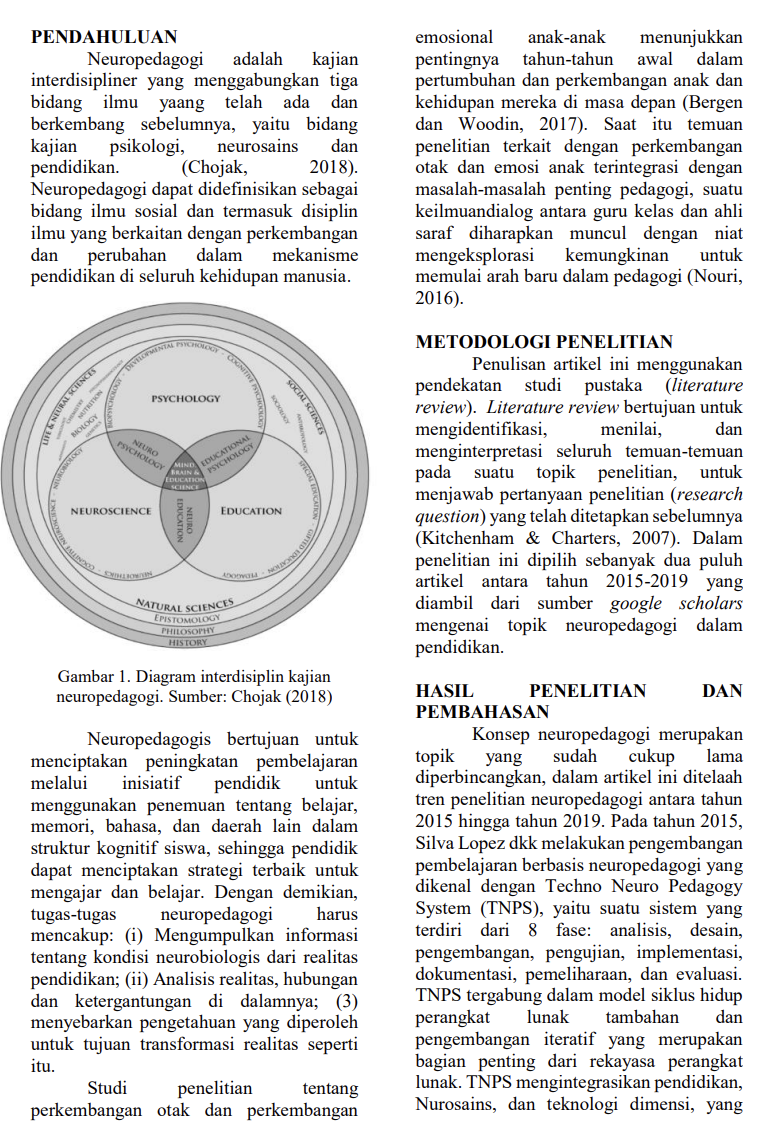

In [14]:
example = dataset["train"][0]
example["image"]

In [15]:
qq = example["image"].convert("RGB")
qq.size

(784, 1146)

In [16]:
words, boxes, ner_tags = example["tokens"], example["bboxes"], example["ner_tags"]
print(words)
print(boxes)
print(ner_tags)

['Gambar', '1.', 'Diagram', 'interdisiplin', 'kajian', 'neuropedagogi.', 'Sumber:', 'Chojak', '(2018)']
[[73, 584, 145, 595], [153, 584, 165, 595], [173, 584, 250, 598], [256, 584, 362, 598], [368, 584, 422, 598], [72, 602, 207, 616], [215, 602, 288, 612], [295, 602, 358, 616], [364, 602, 423, 616]]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


In [15]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [18]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image"
text_column_name = "tokens"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

# In the event the labels are not a `Sequence[ClassLabel]`, we will need to go through the dataset to get the
# unique labels.
def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [19]:
print(label_list)

['image', 'caption-image']


In [20]:
print(id2label)

{0: 'image', 1: 'caption-image'}


In [21]:
def prepare_examples(examples):
  images = examples[image_column_name]
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding

In [22]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features for `set_format` (used later on) to work properly
features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(feature=Value(dtype='int64')),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

Map:   0%|          | 0/11 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

In [23]:
train_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 11
})

In [24]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

'<s> Gambar 1. Diagram interdisiplin kajian neuropedagogi. Sumber: Chojak (2018)</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><

In [25]:
train_dataset.set_format("torch")

In [26]:
import torch

example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 224, 224])
input_ids torch.Size([512])
attention_mask torch.Size([512])
bbox torch.Size([512, 4])
labels torch.Size([512])


In [27]:
eval_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 3
})

In [28]:
processor.tokenizer.decode(eval_dataset[0]["input_ids"])

'<s> Internet of Things 2 connected 2. mh secant, Fig. I. 1oT Can Be Viewed as a Network of Networks (31 Gambar 1. IoT as a Network of Network (Evans, 2011)</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

In [29]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
  print(processor.tokenizer.decode([id]), label.item())

<s> -100
 Gamb 1
ar -100
 1 1
. -100
 Di 1
agram -100
 inter 1
dis -100
ipl -100
in -100
 k 1
aj -100
ian -100
 neuro 1
ped -100
agog -100
i -100
. -100
 S 1
umber -100
: -100
 Cho 1
j -100
ak -100
 ( 1
2018 -100
) -100
</s> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100


In [30]:
!pip install -q seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [31]:
from datasets import load_metric

metric = load_metric("seqeval", trust_remote_code=True)

/tmp/ipython-input-1255862948.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval", trust_remote_code=True)


In [32]:
import numpy as np

return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

In [33]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
import transformers

# Patch missing EncoderDecoderCache for newer versions
if not hasattr(transformers, "EncoderDecoderCache"):
    class EncoderDecoderCache:
        pass
    transformers.EncoderDecoderCache = EncoderDecoderCache

if not hasattr(transformers, "HybridCache"):
    class HybridCache:
        pass
    transformers.HybridCache = HybridCache

In [35]:
from transformers import TrainingArguments, Trainer

try:
  training_args = TrainingArguments(output_dir="test",
                                    max_steps=1000,
                                    per_device_train_batch_size=2,
                                    per_device_eval_batch_size=2,
                                    learning_rate=1e-5,
                                    evaluation_strategy="steps",
                                    eval_steps=100,
                                    load_best_model_at_end=True,
                                    metric_for_best_model="f1")
except ImportError:
    EncoderDecoderCache = None

In [36]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

max_steps is given, it will override any value given in num_train_epochs


In [37]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ellaraputri (ellaraputri-bina-nusantara) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:1051: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
100,No log,1.173036,0.500000,0.625000,0.555556,0.836364
200,No log,1.364482,0.500000,0.625000,0.555556,0.836364
300,No log,1.458628,0.500000,0.625000,0.555556,0.836364
400,No log,1.519919,0.500000,0.625000,0.555556,0.836364
500,0.027600,1.563024,0.500000,0.625000,0.555556,0.836364
600,0.027600,1.599960,0.500000,0.625000,0.555556,0.836364
700,0.027600,0.805447,0.500000,0.750000,0.600000,0.890909
800,0.027600,1.643302,0.500000,0.625000,0.555556,0.836364
900,0.027600,1.654642,0.500000,0.625000,0.555556,0.836364
1000,0.000400,1.582590,0.500000,0.625000,0.555556,0.836364


/usr/local/lib/python3.12/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: image seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.12/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: caption-image seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:1051: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: image seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.12/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: caption-image seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


TrainOutput(global_step=1000, training_loss=0.014010951459407806, metrics={'train_runtime': 724.6389, 'train_samples_per_second': 2.76, 'train_steps_per_second': 1.38, 'total_flos': 483430536572928.0, 'train_loss': 0.014010951459407806, 'epoch': 166.66666666666666})

In [38]:
trainer.evaluate()

/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:1051: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: image seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.12/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: caption-image seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


{'eval_loss': 1.5630239248275757,
 'eval_precision': 0.5,
 'eval_recall': 0.625,
 'eval_f1': 0.5555555555555556,
 'eval_accuracy': 0.8363636363636363,
 'eval_runtime': 0.3772,
 'eval_samples_per_second': 7.954,
 'eval_steps_per_second': 5.303,
 'epoch': 166.66666666666666}

In [9]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("/content/test/checkpoint-1000")

In [12]:
example = dataset["test"][0]
print(example.keys())

dict_keys(['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'])


In [13]:
example

{'id': '0',
 'tokens': ['Internet',
  'of',
  'Things',
  '2',
  'connected',
  '2.',
  'mh',
  'secant,',
  'Fig.',
  'I.',
  '1oT',
  'Can',
  'Be',
  'Viewed',
  'as',
  'a',
  'Network',
  'of',
  'Networks',
  '(31',
  'Gambar',
  '1.',
  'IoT',
  'as',
  'a',
  'Network',
  'of',
  'Network',
  '(Evans,',
  '2011)'],
 'bboxes': [[151, 26, 200, 32],
  [204, 26, 216, 32],
  [220, 25, 265, 34],
  [318, 89, 322, 95],
  [330, 89, 384, 95],
  [318, 114, 323, 119],
  [333, 103, 352, 127],
  [357, 103, 401, 127],
  [90, 177, 106, 184],
  [116, 177, 119, 183],
  [129, 177, 155, 184],
  [160, 179, 172, 184],
  [177, 177, 191, 184],
  [196, 177, 263, 184],
  [241, 168, 251, 192],
  [256, 168, 264, 192],
  [268, 177, 329, 184],
  [318, 168, 330, 192],
  [334, 177, 387, 184],
  [392, 177, 406, 185],
  [22, 198, 82, 207],
  [90, 198, 101, 207],
  [107, 198, 134, 207],
  [139, 201, 154, 207],
  [159, 201, 167, 207],
  [172, 198, 239, 207],
  [243, 198, 260, 207],
  [264, 198, 330, 207],
  [335,

In [16]:
image = example["image"]
words = example["tokens"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

input_ids torch.Size([1, 48])
attention_mask torch.Size([1, 48])
bbox torch.Size([1, 48, 4])
labels torch.Size([1, 48])
pixel_values torch.Size([1, 3, 224, 224])


In [17]:
with torch.no_grad():
  outputs = model(**encoding)

/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:1051: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [18]:
logits = outputs.logits
logits.shape

torch.Size([1, 48, 2])

In [19]:
predictions = logits.argmax(-1).squeeze().tolist()
print(predictions)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [20]:
labels = encoding.labels.squeeze().tolist()
print(labels)

[-100, 0, 0, 0, 0, 0, 0, -100, 0, -100, 0, -100, -100, 0, -100, 0, -100, 0, -100, -100, 0, 0, 0, -100, 0, 0, 0, 0, 0, 0, -100, 1, -100, 1, -100, 1, 1, 1, 1, 1, 1, 1, -100, -100, -100, 1, -100, -100]


In [21]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

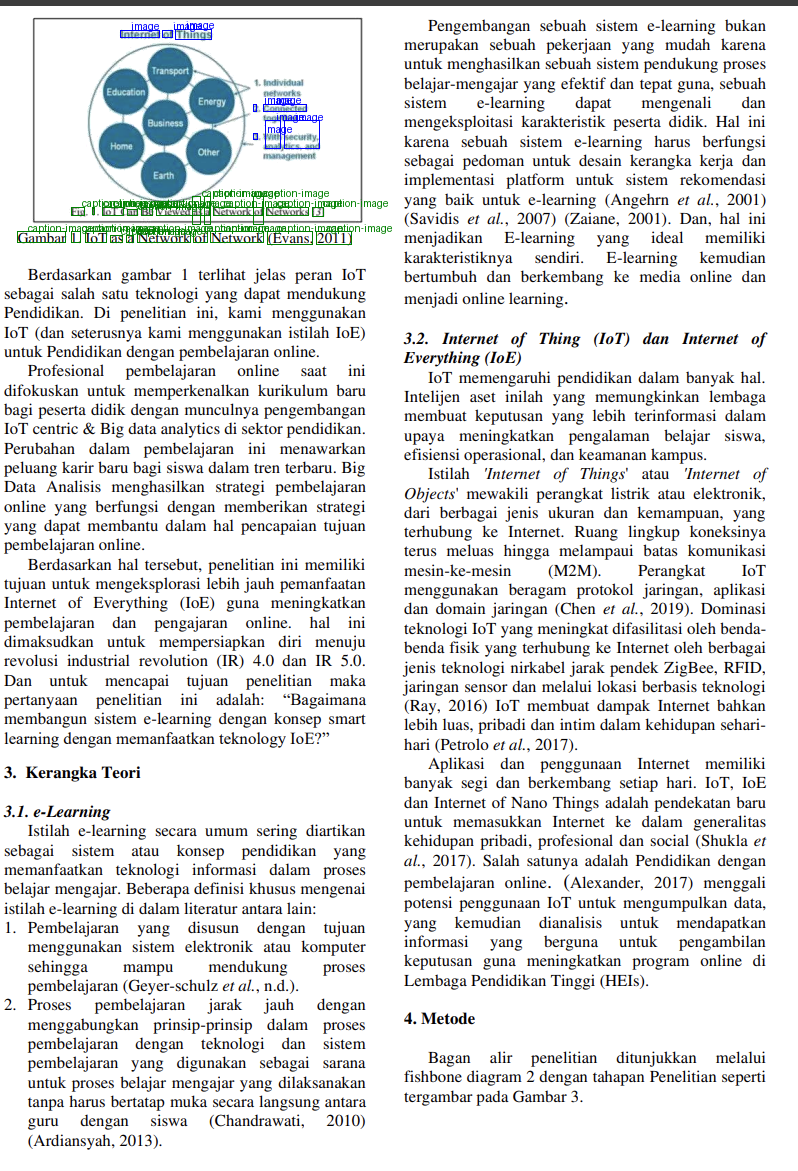

In [22]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label
    if not label:
      return 'other'
    return label

label2color = {'image':'blue', 'caption-image':'green'}

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction).lower()
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

In [51]:
# !cp -r test /content/drive/MyDrive/binus/

In [23]:
for prediction, box in zip(true_predictions, true_boxes):
  print('label:', iob_to_label(prediction).lower())
  print('coordinate ',box[0], box[1], '\n')

label: image
coordinate  120.49799999999999 30.445999999999998 

label: image
coordinate  162.792 30.445999999999998 

label: image
coordinate  175.56 29.275000000000002 

label: image
coordinate  253.764 104.219 

label: image
coordinate  263.34000000000003 104.219 

label: image
coordinate  253.764 133.494 

label: image
coordinate  265.73400000000004 120.613 

label: image
coordinate  284.88599999999997 120.613 

label: caption-image
coordinate  71.82 207.267 

label: caption-image
coordinate  92.568 207.267 

label: caption-image
coordinate  102.94200000000001 207.267 

label: caption-image
coordinate  127.68 209.60899999999998 

label: caption-image
coordinate  141.24599999999998 207.267 

label: caption-image
coordinate  156.40800000000002 207.267 

label: caption-image
coordinate  192.31799999999998 196.728 

label: caption-image
coordinate  204.288 196.728 

label: caption-image
coordinate  213.864 207.267 

label: caption-image
coordinate  253.764 196.728 

label: caption-imag

# Out of Testing Dataset Test

In [5]:
from transformers import AutoModelForTokenClassification
from PIL import Image, ImageDraw, ImageFont
import torch
from transformers import AutoProcessor

def predict_layout(image_path, model_path="/content/test/checkpoint-1000"):
    # Load model
    model = AutoModelForTokenClassification.from_pretrained(model_path)
    model.eval()

    # Load image
    if isinstance(image_path, str):
        image = Image.open(image_path).convert("RGB")
    else:
        image = image_path

    new_processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=True)
    encoding = new_processor(image, return_tensors="pt",
                             truncation=True, max_length=512)

    with torch.no_grad():
        outputs = model(**encoding)

    logits = outputs.logits
    predictions = logits.argmax(-1).squeeze().tolist()

    def unnormalize_box(bbox, width, height):
        return [
            width * (bbox[0] / 1000),
            height * (bbox[1] / 1000),
            width * (bbox[2] / 1000),
            height * (bbox[3] / 1000),
        ]

    width, height = image.size
    token_boxes = encoding.bbox.squeeze().tolist()
    labels = [model.config.id2label[p] for p in predictions]
    true_boxes = [unnormalize_box(b, width, height) for b in token_boxes]

    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    label2color = {'image': 'blue', 'caption-image': 'green'}

    def iob_to_label(label):
        return label.lower() if label else 'other'

    for label, box in zip(labels, true_boxes):
        pred_label = iob_to_label(label)
        color = label2color.get(pred_label, 'red')
        draw.rectangle(box, outline=color, width=2)
        # It seems there's no easy way to get the text for each predicted box after OCR,
        # so we'll just display the predicted label for now.
        draw.text((box[0] + 10, box[1] - 10), text=pred_label, fill=color, font=font)

    return image

In [60]:
# !pip install pytesseract

In [6]:
predicted_img = predict_layout("/content/sample_page.png")
predicted_img.show()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:1051: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


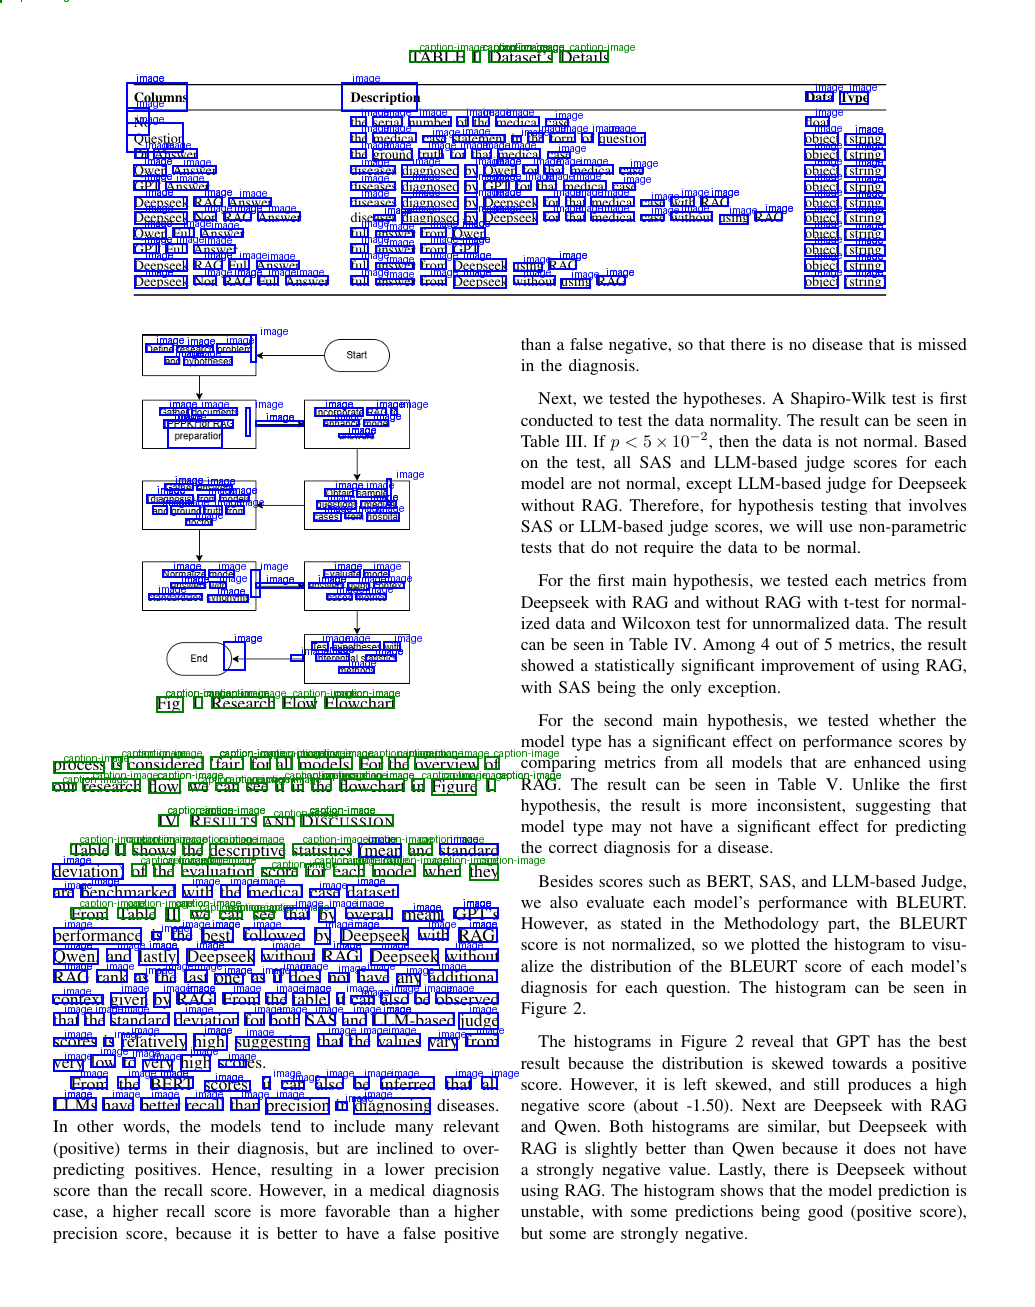

In [7]:
predicted_img